In [12]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from nltk import tokenize
from konlpy.tag import Okt
%matplotlib inline
import matplotlib
import matplotlib.font_manager as fm
from sklearn.decomposition import PCA
import nltk

In [2]:
font_path = r'C:\Users\TJ\Desktop\NanumFontSetup_TTF_ALL\NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=25)

In [3]:
sentence = '''대한항공을 보유한 한진그룹이 아시아나항공을 인수하는 방안이 검토되고 있다.

12일 금융권에 따르면 아시아나항공 채권은행인 산업은행은 대한항공과 아시아나항공을 `한 지붕` 아래 두는 방안을 검토하고 있다.

한진그룹이 산은의 자금 지원을 통해 아시아나항공을 인수하는 방식이 거론된다.한진그룹 지배구조 최상단에 있는 한진칼에 제3자 배정 유상증자 방식으로 자금을 투자하면 한진칼이 금호산업이 가진 아시아나항공 지분(30.77%)을 사들이는 방안이다.

이와 관련 산은은 "여러 가지 옵션 중에서 검토 중이나 확정된 바 없다"고 밝혔다.

대한항공 관계자는 아시아나항공 인수와 관련해 "확인된 바가 없다"며 말을 아꼈다.HDC현대산업개발의 아시아나항공 인수 무산에 따라 아시아나항공은 채권단 관리 체제 아래 놓인 상태다.

아시아나항공은 국책은행으로부터 지원받은 3조3천억원을 이미 소진했고, 최근 기간산업안정기금 자금 2천400억원을 추가로 지원받았다.

아시아나항공의 경영 정상화 방안을 고민하는 가운데 1위 항공사인 대한항공과 합치는 것이 대안으로 떠오른 것으로 보인다.'''

In [4]:
okt = Okt()

In [5]:
nouns = okt.nouns(sentence)

In [19]:
nouns

['대한항공',
 '보유',
 '한진',
 '그룹',
 '아시아나',
 '항공',
 '인수',
 '방안',
 '검토',
 '금융',
 '아시아나',
 '항공',
 '채권',
 '은행',
 '산업',
 '은행',
 '대한항공',
 '아시아나',
 '항공',
 '지붕',
 '아래',
 '방안',
 '검토',
 '한진',
 '그룹',
 '산',
 '의',
 '자금',
 '지원',
 '통해',
 '아시아나',
 '항공',
 '인수',
 '방식',
 '거론',
 '한진',
 '그룹',
 '지배구조',
 '최상',
 '단',
 '한진',
 '칼',
 '제',
 '자',
 '배정',
 '유상증자',
 '방식',
 '자금',
 '투자',
 '한진',
 '칼',
 '금호',
 '산업',
 '아시아나',
 '항공',
 '분',
 '방안',
 '이',
 '관련',
 '산',
 '은',
 '여러',
 '가지',
 '옵션',
 '중',
 '검토',
 '중이',
 '확정',
 '바',
 '고',
 '대한항공',
 '관계자',
 '아시아나',
 '항공',
 '인수',
 '관련',
 '확인',
 '바',
 '며',
 '말',
 '산업',
 '개발',
 '아시아나',
 '항공',
 '인수',
 '무산',
 '아시아나',
 '항공',
 '채권',
 '단',
 '관리',
 '체제',
 '아래',
 '상태',
 '아시아나',
 '항공',
 '국책',
 '은행',
 '지원',
 '소진',
 '최근',
 '기간산업',
 '안정',
 '기금',
 '자금',
 '추가',
 '지원',
 '아시아나',
 '항공',
 '경영',
 '정상화',
 '방안',
 '고민',
 '가운데',
 '위',
 '항공사',
 '대한항공',
 '것',
 '대안',
 '것']

In [30]:
# 문자만 판별 
dataset = []
for i in nouns:
    if i.isalpha():
        dataset.append(i)
    else:
        continue
dataset

['대한항공',
 '보유',
 '한진',
 '그룹',
 '아시아나',
 '항공',
 '인수',
 '방안',
 '검토',
 '금융',
 '아시아나',
 '항공',
 '채권',
 '은행',
 '산업',
 '은행',
 '대한항공',
 '아시아나',
 '항공',
 '지붕',
 '아래',
 '방안',
 '검토',
 '한진',
 '그룹',
 '산',
 '의',
 '자금',
 '지원',
 '통해',
 '아시아나',
 '항공',
 '인수',
 '방식',
 '거론',
 '한진',
 '그룹',
 '지배구조',
 '최상',
 '단',
 '한진',
 '칼',
 '제',
 '자',
 '배정',
 '유상증자',
 '방식',
 '자금',
 '투자',
 '한진',
 '칼',
 '금호',
 '산업',
 '아시아나',
 '항공',
 '분',
 '방안',
 '이',
 '관련',
 '산',
 '은',
 '여러',
 '가지',
 '옵션',
 '중',
 '검토',
 '중이',
 '확정',
 '바',
 '고',
 '대한항공',
 '관계자',
 '아시아나',
 '항공',
 '인수',
 '관련',
 '확인',
 '바',
 '며',
 '말',
 '산업',
 '개발',
 '아시아나',
 '항공',
 '인수',
 '무산',
 '아시아나',
 '항공',
 '채권',
 '단',
 '관리',
 '체제',
 '아래',
 '상태',
 '아시아나',
 '항공',
 '국책',
 '은행',
 '지원',
 '소진',
 '최근',
 '기간산업',
 '안정',
 '기금',
 '자금',
 '추가',
 '지원',
 '아시아나',
 '항공',
 '경영',
 '정상화',
 '방안',
 '고민',
 '가운데',
 '위',
 '항공사',
 '대한항공',
 '것',
 '대안',
 '것']

In [32]:
# 글자수 2글자 이상만 추출
for i in dataset:
    if len(i) ==1:
        dataset.remove(i)
    else:
        continue
dataset

['대한항공',
 '보유',
 '한진',
 '그룹',
 '아시아나',
 '항공',
 '인수',
 '방안',
 '검토',
 '금융',
 '아시아나',
 '항공',
 '채권',
 '은행',
 '산업',
 '은행',
 '대한항공',
 '아시아나',
 '항공',
 '지붕',
 '아래',
 '방안',
 '검토',
 '한진',
 '그룹',
 '자금',
 '지원',
 '통해',
 '아시아나',
 '항공',
 '인수',
 '방식',
 '거론',
 '한진',
 '그룹',
 '지배구조',
 '최상',
 '한진',
 '배정',
 '유상증자',
 '방식',
 '자금',
 '투자',
 '한진',
 '금호',
 '산업',
 '아시아나',
 '항공',
 '방안',
 '관련',
 '여러',
 '가지',
 '옵션',
 '검토',
 '중이',
 '확정',
 '대한항공',
 '관계자',
 '아시아나',
 '항공',
 '인수',
 '관련',
 '확인',
 '산업',
 '개발',
 '아시아나',
 '항공',
 '인수',
 '무산',
 '아시아나',
 '항공',
 '채권',
 '관리',
 '체제',
 '아래',
 '상태',
 '아시아나',
 '항공',
 '국책',
 '은행',
 '지원',
 '소진',
 '최근',
 '기간산업',
 '안정',
 '기금',
 '자금',
 '추가',
 '지원',
 '아시아나',
 '항공',
 '경영',
 '정상화',
 '방안',
 '고민',
 '가운데',
 '항공사',
 '대한항공',
 '대안']

In [7]:
# 불용어 처리
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','하다',",",'"','`','.','에'
            ,'된다','(',')','이다','중','없다','인','것','보인다','밝혔다','것','하는','받았다','바','며']

In [33]:
nouns_stopwords = [i for i in dataset if i not in stopwords]

In [34]:
nouns_stopwords

['대한항공',
 '보유',
 '한진',
 '그룹',
 '아시아나',
 '항공',
 '인수',
 '방안',
 '검토',
 '금융',
 '아시아나',
 '항공',
 '채권',
 '은행',
 '산업',
 '은행',
 '대한항공',
 '아시아나',
 '항공',
 '지붕',
 '아래',
 '방안',
 '검토',
 '한진',
 '그룹',
 '자금',
 '지원',
 '통해',
 '아시아나',
 '항공',
 '인수',
 '방식',
 '거론',
 '한진',
 '그룹',
 '지배구조',
 '최상',
 '한진',
 '배정',
 '유상증자',
 '방식',
 '자금',
 '투자',
 '한진',
 '금호',
 '산업',
 '아시아나',
 '항공',
 '방안',
 '관련',
 '여러',
 '가지',
 '옵션',
 '검토',
 '중이',
 '확정',
 '대한항공',
 '관계자',
 '아시아나',
 '항공',
 '인수',
 '관련',
 '확인',
 '산업',
 '개발',
 '아시아나',
 '항공',
 '인수',
 '무산',
 '아시아나',
 '항공',
 '채권',
 '관리',
 '체제',
 '아래',
 '상태',
 '아시아나',
 '항공',
 '국책',
 '은행',
 '지원',
 '소진',
 '최근',
 '기간산업',
 '안정',
 '기금',
 '자금',
 '추가',
 '지원',
 '아시아나',
 '항공',
 '경영',
 '정상화',
 '방안',
 '고민',
 '가운데',
 '항공사',
 '대한항공',
 '대안']

In [35]:
# Text화
nouns_stopwords = nltk.Text(nouns_stopwords)

In [36]:
nouns_stopwords

<Text: 대한항공 보유 한진 그룹 아시아나 항공 인수 방안...>

In [37]:
nouns_vocab = nouns_stopwords.vocab()

In [38]:
nouns_vocab

FreqDist({'아시아나': 10, '항공': 10, '한진': 5, '대한항공': 4, '인수': 4, '방안': 4, '그룹': 3, '검토': 3, '은행': 3, '산업': 3, ...})

In [52]:
top30 = nouns_stopwords.vocab().most_common(30)
top30

[('아시아나', 10),
 ('항공', 10),
 ('한진', 5),
 ('대한항공', 4),
 ('인수', 4),
 ('방안', 4),
 ('그룹', 3),
 ('검토', 3),
 ('은행', 3),
 ('산업', 3),
 ('자금', 3),
 ('지원', 3),
 ('채권', 2),
 ('아래', 2),
 ('방식', 2),
 ('관련', 2),
 ('보유', 1),
 ('금융', 1),
 ('지붕', 1),
 ('통해', 1),
 ('거론', 1),
 ('지배구조', 1),
 ('최상', 1),
 ('배정', 1),
 ('유상증자', 1),
 ('투자', 1),
 ('금호', 1),
 ('여러', 1),
 ('가지', 1),
 ('옵션', 1)]

In [58]:
top30[0][0]

'아시아나'

In [59]:
top30_content = []
for i in top30:
    line =[]
    for j in range(1):
        line.append(i[0])
    top30_content.append(line)
top30_content

[['아시아나'],
 ['항공'],
 ['한진'],
 ['대한항공'],
 ['인수'],
 ['방안'],
 ['그룹'],
 ['검토'],
 ['은행'],
 ['산업'],
 ['자금'],
 ['지원'],
 ['채권'],
 ['아래'],
 ['방식'],
 ['관련'],
 ['보유'],
 ['금융'],
 ['지붕'],
 ['통해'],
 ['거론'],
 ['지배구조'],
 ['최상'],
 ['배정'],
 ['유상증자'],
 ['투자'],
 ['금호'],
 ['여러'],
 ['가지'],
 ['옵션']]

In [53]:
# top30 단어만 가져오기
top30_content = []
for i in top30:
    top30_content.append(list(i[0]))
top30_content

[['아', '시', '아', '나'],
 ['항', '공'],
 ['한', '진'],
 ['대', '한', '항', '공'],
 ['인', '수'],
 ['방', '안'],
 ['그', '룹'],
 ['검', '토'],
 ['은', '행'],
 ['산', '업'],
 ['자', '금'],
 ['지', '원'],
 ['채', '권'],
 ['아', '래'],
 ['방', '식'],
 ['관', '련'],
 ['보', '유'],
 ['금', '융'],
 ['지', '붕'],
 ['통', '해'],
 ['거', '론'],
 ['지', '배', '구', '조'],
 ['최', '상'],
 ['배', '정'],
 ['유', '상', '증', '자'],
 ['투', '자'],
 ['금', '호'],
 ['여', '러'],
 ['가', '지'],
 ['옵', '션']]

In [60]:
# word2vec 모델 생성
model = Word2Vec(
    top30_content
    ,size=300 # 차원수 
    ,window=5 # 앞뒤 폭
    ,min_count=1 # 출현 빈도
    ,workers=1 # 동시에 처리할 작업 수
    ,sg=0 # CBOW
)

In [61]:
# 단어 벡터를 구한다
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [62]:
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

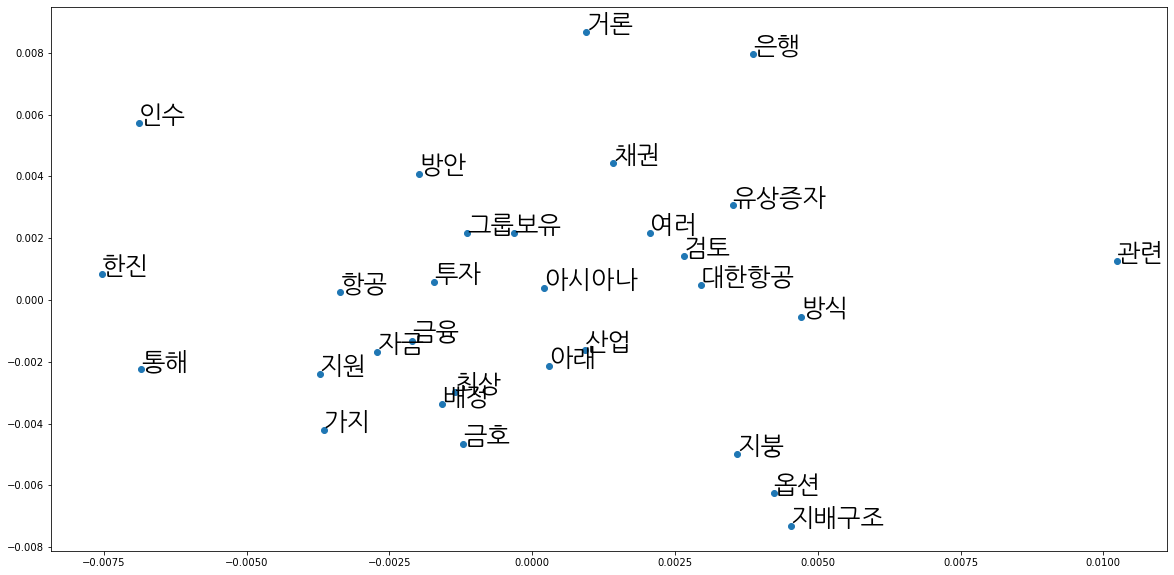

In [64]:
plt.figure(figsize =(20,10))
plt.scatter(xs,ys,marker='o')
for i,v in enumerate(vocabs):
    plt.annotate(v,xy=(xs[i],ys[i]),fontproperties=fontprop)